In [11]:
import numpy as np
import pandas as pd

In [40]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

target_names =  iris_dataset.target_names
feature_names =  iris_dataset.feature_names

In [44]:
iris_dataset = pd.DataFrame(data= np.c_[iris_dataset["data"], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])

iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [45]:
X = iris_dataset.drop(["target"], axis=1)
y = iris_dataset["target"]
X.shape, y.shape

((150, 4), (150,))

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression().fit(X_train, y_train)

In [48]:
train_score = classifier.score(X_train, y_train)
round(train_score, 3)

1.0

In [49]:
predictions = classifier.predict(X_test)
predictions

array([2., 1., 2., 1., 0., 2., 2., 0., 0., 0., 1., 0., 2., 0., 0., 0., 1.,
       0., 0., 1., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 0., 2.,
       0., 2., 0., 1., 2., 1., 1., 2., 2., 0., 0.])

In [50]:
test_score = classifier.score(X_test, y_test)
round(test_score, 3)

0.956

In [51]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("dark")

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

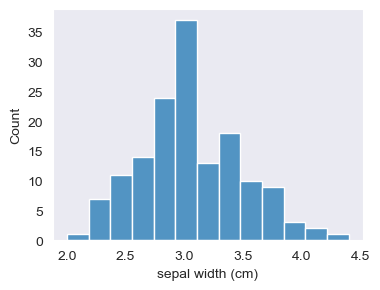

In [52]:
plt.figure(figsize=(4,3))
sns.histplot(iris_dataset, x='sepal width (cm)')

<Figure size 400x300 with 0 Axes>

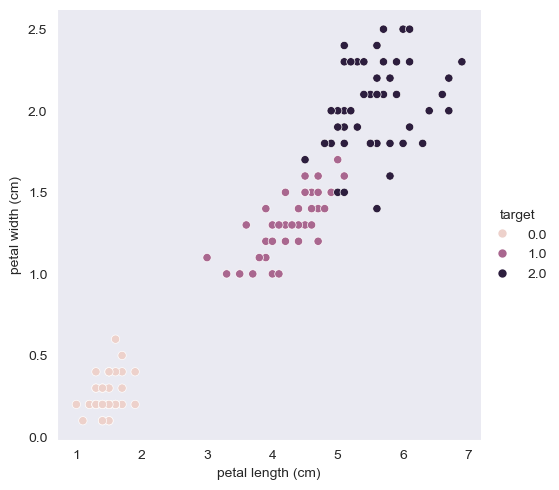

In [62]:
plt.figure(figsize=(4,3))
sns.relplot(x='petal length (cm)', y='petal width (cm)', data=iris_dataset, hue='target')

In [41]:
from sklearn.metrics import  confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(conf_matrix, index = target_names, columns = target_names)

<Axes: >

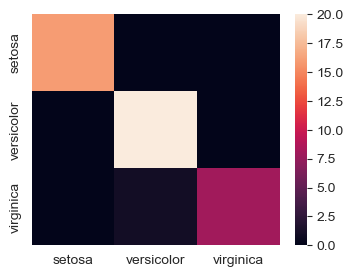

In [42]:
plt.figure(figsize=(4,3))
corr = cm_df.corr()
sns.heatmap(cm_df)